# 📈 Predict Future Stock Prices (Short-Term)

### 🎯 Goal:
Use historical stock data from Yahoo Finance to predict the next day's **closing price** using features like `Open`, `High`, `Low`, and `Volume`.

In [3]:
# 📌 1. Import Required Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/c9/1e/631c80e0f97aef46eb73549b9b0f60d94057294e040740f4cad0cb1f48e4/yfinance-0.2.65-py2.py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     -- ------------------------------------ 61.4/949.2 kB 1.7 MB/s eta 0:00:01
     --- ----------------------------------- 92.2/949.2 kB 1.3 MB/s eta 0:00:01
     ---- --------------------------------- 112.6/949.2 kB 1.1 MB/s eta 0:00:01
     ---- --------------------------------- 112.6/949.2 kB 1.1 MB/s eta 0:00:01
     ---- --------------------------------- 112.6/949.2 kB 1.1 MB/s eta 0:00:01
     

In [4]:
# 📌 2. Define the stock you want to analyze
stock_symbol = 'AAPL'  # You can change this to any stock symbol

# 📌 3. Load Historical Stock Data
# We'll fetch 2 years of daily data
data = yf.download(stock_symbol, period='2y', interval='1d')
data = data.dropna()  # drop any rows with missing data
data.head()

C:\Users\AAFIA\AppData\Local\Temp\ipykernel_7464\1555528608.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, period='2y', interval='1d')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-07-31,194.502594,194.542206,193.324388,194.116461,38824100
2023-08-01,193.670914,194.779806,193.344183,194.294673,35175100
2023-08-02,190.670975,193.245192,189.948215,193.106581,50389300
2023-08-03,189.274933,190.463034,188.799695,189.670977,61235200
2023-08-04,180.185944,185.522512,180.116630,183.680950,115956800


In [5]:
# 📌 4. Preprocessing: Feature Selection
df = data[['Open', 'High', 'Low', 'Volume', 'Close']].copy()
df['Next_Close'] = df['Close'].shift(-1)
df = df.dropna()
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Next_Close']

In [6]:
# 📌 5. Split the Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 📌 6. Train the Model - Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
# 📌 7. Make Predictions
predictions = model.predict(X_test)

# 📌 8. Evaluation
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 51.71
R² Score: 0.49


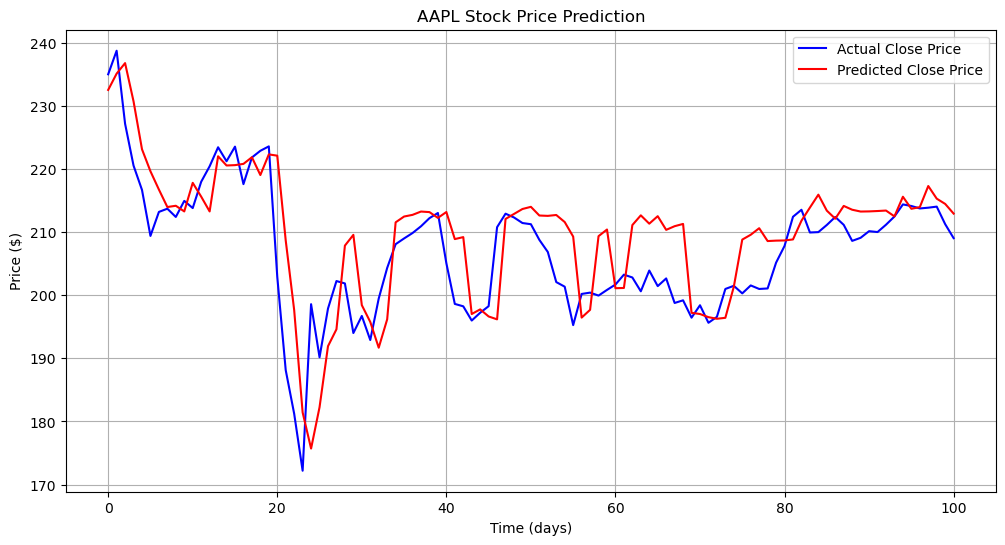

In [8]:
# 📌 9. Plot Actual vs Predicted Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Close Price', color='blue')
plt.plot(predictions, label='Predicted Close Price', color='red')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Time (days)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()